In [2]:

import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt 
import random   
import scipy.stats
from scipy import stats
from statannotations.Annotator import Annotator

In [3]:

def convertTuple(tup):
    to = []
    for tu in tup:# initialize an empty string
        string = ''
        for item in tu:
            string = string + str(item)
        to.append(string)
        
    return to

In [4]:
def sync_boolean_t_plus_1(t_0,t_1):
    t_1[t_1 ==0] = t_0[t_1 ==0]
    t_1[t_1 > 0] = 1
    t_1[t_1 < 0] = -1
    return t_1

In [5]:
def async_boolean_t_plus_1(t_0,t_1):
    i = random.randint(0,len(t_1)-1)
    t_2 = t_0.copy()

    if t_1[i] > 0 :
        t_2[i]=1
    elif t_1[i] < 0:
        t_2[i]=-1
    else:
        t_2[i] = t_0[i]
    return t_2


In [6]:
def sync_match(mat,t_0):
    t_1 = sync_boolean_t_plus_1(t_0,mat.dot(t_0))
    if np.array_equal(t_0,t_1):
        return True
    else:
        return False

In [7]:
def add_subtract_elements(tuple_data):
    length = len(tuple_data)
    
    if length % 2 != 0:
        # If the length is odd, you may want to handle it differently
        raise ValueError("Tuple length must be even for this operation")

    half_length = length // 2
    result = sum(tuple_data[:half_length]) - sum(tuple_data[half_length:])
    return result

tuple_data = (1, 1, 1, -1, -1, -1)
result = add_subtract_elements(tuple_data)
print(result)

6


In [8]:
from itertools import product
values = [0, 1]
permutations = list(product(values, repeat=2))

print(permutations)

[(0, 0), (0, 1), (1, 0), (1, 1)]


In [9]:
def replace_minus_one_with_zero(input_tuple):
    return tuple(0 if x == -1 else x for x in input_tuple)



In [10]:
from tqdm import tqdm

In [11]:
def boolean_asyc_runs_list_method(  interaction_matrix,trials):

    values = [-1, 1]
    permutations = list(product(values, repeat=len(interaction_matrix)))
    permutations

    steady_state_list = []
    count = 0

    for i in tqdm(range(trials)):
        starting_state= np.array(permutations[random.randint(0,len(permutations)-1)])

        for i in range(1):
            ini_st_vector_1 = starting_state.copy()
            j=0
            count = 0 
            while count !=100 and j < 10000:
                j+=1
                ini_st_vector_0 = ini_st_vector_1.copy()
                ini_st_vector_inter = np.array(interaction_matrix)@ini_st_vector_1
                #print(np.array(ini_st_vector_inter))
                ini_st_vector_1 =async_boolean_t_plus_1(ini_st_vector_0,ini_st_vector_inter)
                #print(ini_st_vector_0,ini_st_vector_1)

                if np.array_equal(ini_st_vector_0,ini_st_vector_1):
                    count+=1
                    if count == 100:
                        steady_state_list.append(tuple(ini_st_vector_1))
                        
                        break
                else:
                    count = 0
    


    series = pd.Series(steady_state_list)


    element_counts = series.value_counts().reset_index()


    element_counts.columns = ['Element', 'Count']
    element_counts.loc[:,'Frequency']=element_counts.loc[:,'Count']/len(steady_state_list)
    element_counts=element_counts.T

    for i in range(len(element_counts.T)):
        element_counts.loc['State',i] = replace_minus_one_with_zero(element_counts.loc['Element',i])
    
    li= element_counts.loc['State',:]
    li = convertTuple(list(li))
    element_counts.loc['Final_State',:]=li
    element_counts.loc['Vector_Metric',:] = element_counts.loc['Element',:].apply(lambda x: add_subtract_elements(x))


    element_counts.columns = element_counts.loc['Element',:]

    return element_counts


In [12]:
def boolean_asyc_runs_list_method_paths(  interaction_matrix, trials):

    values = [-1, 1]
    #permutations = list(product(values, repeat=len(interaction_matrix)))
    #permutations
    # starting_tuple = tuple(random.choices([-1, 1], k=30))
    total_iterations = 100

    # Initialize tqdm with the total number of iterations
    progress_bar = tqdm(total=trials, desc="Processing")
    steady_state_list = []
    count = 0
    steady = 0

    while steady < trials:
    # for i in tqdm(range(trials)):
        starting_state= np.array(tuple(random.choices([-1, 1], k=len(interaction_matrix))))

        for k in range(1):
            ini_st_vector_1 = starting_state.copy()
            j=0
            count = 0 
            while count !=200 and j  <10000:
                j+=1
                #print(j)
                ini_st_vector_0 = ini_st_vector_1.copy()
                ini_st_vector_inter = np.array(interaction_matrix)@ini_st_vector_1
                #print(np.array(ini_st_vector_inter))
                ini_st_vector_1 =async_boolean_t_plus_1(ini_st_vector_0,ini_st_vector_inter)
                #print(ini_st_vector_0,ini_st_vector_1)

                if np.array_equal(ini_st_vector_0,ini_st_vector_1):
                    count+=1
                    if count == 200 :
                        if sync_match(interaction_matrix,ini_st_vector_0):
                            steady_state_list.append(tuple(ini_st_vector_1))
                            steady +=1
                            progress_bar.update(1)
                            break
                        else:
                            count =  0
                        
                        
                        
                else:
                    count = 0
    


    series = pd.Series(steady_state_list)


    element_counts = series.value_counts().reset_index()


    element_counts.columns = ['Element', 'Count']
    element_counts.loc[:,'Frequency']=element_counts.loc[:,'Count']/len(steady_state_list)
    element_counts=element_counts.T

    for i in range(len(element_counts.T)):
        element_counts.loc['State',i]= replace_minus_one_with_zero(element_counts.loc['Element',i])
    
    li= element_counts.loc['State',:]
    li = convertTuple(list(li))
    element_counts.loc['Final_State',:]=li
    element_counts.loc['Vector_Metric',:] = element_counts.loc['Element',:].apply(lambda x: add_subtract_elements(x))

    progress_bar.close()
    element_counts.columns = element_counts.loc['Element',:]
    print(steady)
    return element_counts


In [13]:
import fnmatch
from scipy.stats import kurtosis
from scipy.stats import skew

In [14]:
def BiC(dataframe,node):
    n=len(dataframe)
    sk=skew(dataframe.loc[:,node],axis=0,bias=True)
    kur=kurtosis(dataframe.loc[:,node],bias=True,axis=0,fisher=True)
    ncum=(pow(n-1,2))/((n-2)*(n-3))
    bic=(pow(sk,2) + 1)/(kur +3*ncum)
    return bic


In [15]:
def boolean_asyc_runs_list_method_paths(  interaction_matrix, trials):

    values = [-1, 1]

    total_iterations = 100

    progress_bar = tqdm(total=trials, desc="Processing")
    steady_state_list = []
    count = 0
    steady = 0

    while steady < trials:

        starting_state= np.array(tuple(random.choices([-1, 1], k=len(interaction_matrix))))

        for k in range(1):
            ini_st_vector_1 = starting_state.copy()
            j=0
            count = 0 
            while count !=200 and j  <10000:
                j+=1
                #print(j)
                ini_st_vector_0 = ini_st_vector_1.copy()
                ini_st_vector_inter = np.array(interaction_matrix)@ini_st_vector_1
                #print(np.array(ini_st_vector_inter))
                ini_st_vector_1 =async_boolean_t_plus_1(ini_st_vector_0,ini_st_vector_inter)
                #print(ini_st_vector_0,ini_st_vector_1)

                if np.array_equal(ini_st_vector_0,ini_st_vector_1):
                    count+=1
                    if count == 200 :
                        if sync_match(interaction_matrix,ini_st_vector_0):
                            steady_state_list.append(tuple(ini_st_vector_1))
                            steady +=1
                            progress_bar.update(1)
                            break
                        else:
                            count =  0
                        
                        
                        
                else:
                    count = 0
    


    series = pd.Series(steady_state_list)


    element_counts = series.value_counts().reset_index()


    element_counts.columns = ['Element', 'Count']
    element_counts.loc[:,'Frequency']=element_counts.loc[:,'Count']/len(steady_state_list)
    element_counts=element_counts.T

    for i in range(len(element_counts.T)):
        element_counts.loc['State',i]= replace_minus_one_with_zero(element_counts.loc['Element',i])
    
    li= element_counts.loc['State',:]
    li = convertTuple(list(li))
    element_counts.loc['Final_State',:]=li
    element_counts.loc['Vector_Metric',:] = element_counts.loc['Element',:].apply(lambda x: add_subtract_elements(x))

    progress_bar.close()
    element_counts.columns = element_counts.loc['Element',:]
    print(steady)
    return element_counts


In [16]:
def Topo_adj(dp):
    n=len(set(dp['Source']))
    adj = pd.DataFrame([[0]*n]*n)
    adj.columns=list(set(dp.loc[:,'Source']))
    #print(list(set(dp.loc[:,'Source'])))
    #print(set(dp.loc[:,'Source']))
    adj.index=list(set(dp.loc[:,'Target']))
    #print(list(set(dp.loc[:,'Target'])))
    for i in range(len(dp)):
        if dp.iloc[i,2] == 1:
            adj.loc[dp.iloc[i,0] , dp.iloc[i,1] ] = 1
        elif dp.iloc[i,2] == 2:
            adj.loc[dp.iloc[i,0] , dp.iloc[i,1] ] = -1

    

    return adj


def matrix_index_sort(mat):
    mat = mat.sort_index()
    mat = mat.T
    mat = mat.sort_index()
    mat = mat.T
    return mat

In [17]:
def centreing_index(node_list,no_core_nodes):
    col=node_list
    
    t=''
    k=''
    end_ind_old=len(node_list)- no_core_nodes
    end_ind=len(node_list)- no_core_nodes
    #print(end_ind)
    if end_ind_old == 0:
        return node_list

    for i in range(end_ind_old):
        #print(i)
        
        if i in range(int((len(node_list)/2))-int(no_core_nodes/2),int((len(node_list)/2)) + int(no_core_nodes/2)):
            t+=col[end_ind]
            end_ind += 1
            k+=col[i]
        else:
            t+=col[i]
    
    t=t+k
    t


    return t




In [18]:
def boolean_f1_finder_list(interaction_matrix,trails,coresize):
    dataframe =boolean_asyc_runs_list_method_paths(interaction_matrix,trails)
    #df=dataframe.copy()
    team_size = int(coresize/2)
    repeat = len(interaction_matrix)
    #print(12,centreing_index('?'*(repeat-coresize) + '0'*team_size  + '1'*team_size ,coresize))
    #print(repeat-coresize,'?'*(repeat-coresize))
    filtered = fnmatch.filter(list(dataframe.loc['Final_State',:]),centreing_index('?'*(repeat-coresize) + '0'*team_size  + '1'*team_size ,coresize))+ fnmatch.filter(list(dataframe.loc['Final_State',:]),centreing_index('?'*(repeat-coresize) + '1'*team_size  + '0'*team_size ,coresize))
    #print(1,filtered)
    dataframe.columns = dataframe.loc['Final_State',:]

    return dataframe[filtered].loc['Frequency',:].sum()/dataframe.loc['Frequency',:].sum()

In [19]:
import glob
import os
#('Network_5N_10E', 1, 5, 10, '5N_10E', rp)

def BiC_CC_F1_team_strength(filename, n_files, nodes, edges,label,coresize,Self_Activation_Status ,Density,rp):
    print(rp)

    global melt_table_complete

    F1_list=[]

    indices=[]

    columns = ['index','Team_Size','BiC A','CC AB','F1','F1_Individual_Nodes_Considered','Team_Strength','Density','Impurity','Nodes','Edges','Label','Self_Activation_Status']


    temp_table_complete=pd.DataFrame([[0]*len(columns)]*n_files)
    temp_table_complete.columns = columns
    temp_table_complete.loc[:,'Nodes']=nodes
    temp_table_complete.loc[:,'Edges']=edges
    temp_table_complete.loc[:,'Label']=label
    temp_table_complete.loc[:,'Team_Size'] = 'Team Size ' + str(int(coresize/2))
    temp_table_complete.loc[:,'Self_Activation_Status'] = Self_Activation_Status
    temp_table_complete.loc[:,'Density'] = Density



    #file_name = folderi[0: folderi.find("N_")+1 ]+'/'+folderi+'/'+folderi+'_'+ str(rp)+'.topo'
    file_name = filename
    topo_file = pd.read_csv(file_name,sep='\t')
    
    print(file_name)

    tuio =boolean_f1_finder_list(  matrix_index_sort(Topo_adj(topo_file)), 1000,coresize )
    F1_list.append(tuio)
    #print(F1_list)
    indices.append(str(Density)+ '_'+Self_Activation_Status+'_'+'Network'+ '_' + str(rp))
    # indices.append(label+'_' + str(rp))
    #print(file_name)
    temp_table_complete.loc[:,'F1']=F1_list
    temp_table_complete.loc[:,'index']=indices
    #melt_table_complete=pd.concat([melt_table_complete, temp_table_complete])


    
    return temp_table_complete

In [20]:
melt_table_complete=pd.DataFrame(columns=['index','Team_Size','BiC A','CC AB','F1','F1_Individual_Nodes_Considered','Team_Strength','Density','Impurity','Nodes','Edges','Label','Self_Activation_Status'])
melt_table_complete


,index,Team_Size,BiC A,CC AB,F1,F1_Individual_Nodes_Considered,Team_Strength,Density,Impurity,Nodes,Edges,Label,Self_Activation_Status


In [84]:
import multiprocessing


def process_parameter_set(parameters):
    return BiC_CC_F1_team_strength(*parameters)

if __name__ == "__main__":
    # Define the number of cores
    num_cores = 15

    # Create a multiprocessing pool with the number of desired cores
    pool = multiprocessing.Pool(processes=num_cores)

    # Define the range of rp values to distribute among cores (0 to 99)
    rp_range = range(100)

    # Create a list of input parameter sets for each unique rp
    parameter_sets = [ ('Density_20/Density_20_Network_10N_core'+str(rp)+'.topo', 1, 0, 0, '5N_10E',2,'With Self Activation','Density 20%', rp) for rp in rp_range] 
    parameter_sets.extend([ ('Density_40/Density_40_Network_10N_core'+str(rp)+'.topo', 1, 0, 0, '5N_10E',2,'With Self Activation','Density 40%', rp) for rp in rp_range] )
    parameter_sets.extend([ ('Density_60/Density_60_Network_10N_core'+str(rp)+'.topo', 1, 0, 0, '5N_10E',2,'With Self Activation', 'Density 60%',rp) for rp in rp_range] )
    parameter_sets.extend([ ('Density_80/Density_80_Network_10N_core'+str(rp)+'.topo', 1, 0, 0, '5N_10E',2,'With Self Activation','Density 80%', rp) for rp in rp_range] )
    parameter_sets.extend([ ('Density_100/Density_100_Network_10N_core'+str(rp)+'.topo', 1, 0, 0, '5N_10E',2,'With Self Activation', 'Density 100%',rp) for rp in range(10)] )
    


    # Use the pool.map() function to parallelize the processing for each unique rp
    results = pool.map(process_parameter_set, parameter_sets)

    # Close the pool to release resources
    pool.close()
    pool.join()

    # Merge the DataFrames into a single DataFrame
    melt_table_complete_run = pd.concat(results, ignore_index=True)
    melt_table_complete=pd.concat([melt_table_complete,melt_table_complete_run])
    # Now you have a single DataFrame "melt_table_complete" with all the results
#print(parameter_sets)
melt_table_complete

Processing: 100%|██████████| 1000/1000 [00:04<00:00, 207.43it/s]


1000
53
Density_80/Density_80_Network_10N_core53.topo


Processing: 100%|██████████| 1000/1000 [00:05<00:00, 190.96it/s]


1000


Processing:  27%|██▋       | 268/1000 [00:01<00:03, 234.45it/s]/tmp/ipykernel_5868/396412543.py:40: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  temp_table_complete.loc[:,'F1']=F1_list


46


Processing:  92%|█████████▏| 919/1000 [00:04<00:00, 194.74it/s]

Density_80/Density_80_Network_10N_core46.topo


Processing: 100%|██████████| 1000/1000 [00:04<00:00, 248.94it/s]


1000


Processing:  91%|█████████ | 908/1000 [00:03<00:00, 203.00it/s]

81

Processing:  32%|███▏      | 321/1000 [00:01<00:02, 248.51it/s]


Density_80/Density_80_Network_10N_core81.topo


Processing: 100%|██████████| 1000/1000 [00:04<00:00, 207.65it/s]


1000

Processing:   7%|▋         | 69/1000 [00:00<00:04, 210.43it/s]

/tmp/ipykernel_5868/396412543.py:40: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  temp_table_complete.loc[:,'F1']=F1_list


39


Processing:  84%|████████▎ | 836/1000 [00:04<00:00, 205.52it/s]

Density_80/Density_80_Network_10N_core39.topo

Processing:  42%|████▎     | 425/1000 [00:02<00:03, 159.48it/s]

Processing:   9%|▉         | 91/1000 [00:00<00:04, 198.35it/s]

1000


Processing:  86%|████████▌ | 857/1000 [00:04<00:00, 196.49it/s]

74

Processing:   1%|▏         | 13/1000 [00:00<00:07, 126.85it/s]]

Processing:  14%|█▍        | 143/1000 [00:00<00:04, 204.60it/s]

Density_80/Density_80_Network_10N_core74.topo

Processing:  66%|██████▋   | 664/1000 [00:03<00:01, 170.15it/s]

Processing: 100%|██████████| 1000/1000 [00:04<00:00, 242.19it/s]


1000
88

Processing:  88%|████████▊ | 877/1000 [00:04<00:00, 158.06it/s]


Density_80/Density_80_Network_10N_core88.topo


Processing:  51%|█████     | 506/1000 [00:02<00:02, 177.22it/s]

1000
60
Density_80/Density_80_Network_10N_core60.topo


Processing: 100%|██████████| 1000/1000 [00:05<00:00, 186.23it/s]


1000


Processing:  22%|██▎       | 225/1000 [00:01<00:04, 165.15it/s]

67


Processing:  24%|██▍       | 245/1000 [00:01<00:03, 207.83it/s]

Density_80/Density_80_Network_10N_core67.topo

Processing:   9%|▉         | 92/1000 [00:00<00:06, 142.12it/s]

Processing:  10%|▉         | 95/1000 [00:00<00:04, 183.14it/s]s]


1000


/tmp/ipykernel_5868/396412543.py:40: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  temp_table_complete.loc[:,'F1']=F1_list


95


Processing:  65%|██████▍   | 649/1000 [00:03<00:01, 216.45it/s]

Density_80/Density_80_Network_10N_core95.topo


Processing: 100%|██████████| 1000/1000 [00:05<00:00, 189.57it/s]


1000


Processing:  23%|██▎       | 227/1000 [00:01<00:05, 133.15it/s]

2


Processing:   8%|▊         | 76/1000 [00:00<00:03, 258.61it/s]

Density_100/Density_100_Network_10N_core2.topo


Processing: 100%|██████████| 1000/1000 [00:05<00:00, 191.24it/s]


1000
9
Density_100/Density_100_Network_10N_core9.topo


Processing: 100%|██████████| 1000/1000 [00:05<00:00, 189.60it/s]


1000


Processing:  43%|████▎     | 427/1000 [00:02<00:03, 176.21it/s]

26


Processing:  47%|████▋     | 472/1000 [00:02<00:04, 123.73it/s]

Density_80/Density_80_Network_10N_core26.topo


Processing: 100%|██████████| 1000/1000 [00:05<00:00, 188.43it/s]


1000


Processing:  59%|█████▉    | 591/1000 [00:03<00:02, 171.98it/s]

33
Density_80/Density_80_Network_10N_core33.topo

Processing:  45%|████▍     | 446/1000 [00:02<00:03, 175.61it/s]

Processing:   8%|▊         | 80/1000 [00:00<00:03, 264.58it/s]

1000


Processing:  56%|█████▌    | 555/1000 [00:03<00:02, 195.62it/s]/tmp/ipykernel_5868/396412543.py:40: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  temp_table_complete.loc[:,'F1']=F1_list


19


Processing:   8%|▊         | 76/1000 [00:00<00:04, 188.78it/s]

Density_80/Density_80_Network_10N_core19.topo


Processing: 100%|██████████| 1000/1000 [00:05<00:00, 185.72it/s]


1000
54


Processing:  92%|█████████▏| 921/1000 [00:05<00:00, 193.20it/s]

Density_80/Density_80_Network_10N_core54.topo


Processing: 100%|██████████| 1000/1000 [00:05<00:00, 189.95it/s]


1000


Processing:  81%|████████  | 806/1000 [00:04<00:01, 162.07it/s]

82


Processing:  37%|███▋      | 370/1000 [00:01<00:03, 208.86it/s]

Density_80/Density_80_Network_10N_core82.topo


Processing: 100%|██████████| 1000/1000 [00:05<00:00, 194.80it/s]


1000


Processing:  80%|███████▉  | 797/1000 [00:04<00:01, 145.84it/s]/tmp/ipykernel_5868/396412543.py:40: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  temp_table_complete.loc[:,'F1']=F1_list


75

Processing:   3%|▎         | 28/1000 [00:00<00:06, 142.22it/s]


Density_80/Density_80_Network_10N_core75.topo


Processing: 100%|██████████| 1000/1000 [00:05<00:00, 184.00it/s]


1000
40


Processing:  82%|████████▏ | 816/1000 [00:04<00:01, 154.66it/s]

Density_80/Density_80_Network_10N_core40.topo


Processing: 100%|██████████| 1000/1000 [00:05<00:00, 172.08it/s]


1000


/tmp/ipykernel_5868/396412543.py:40: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  temp_table_complete.loc[:,'F1']=F1_list
Processing:   0%|          | 0/1000 [00:00<?, ?it/s]

47


Processing:   3%|▎         | 28/1000 [00:00<00:03, 276.31it/s]

Density_80/Density_80_Network_10N_core47.topo


Processing: 100%|██████████| 1000/1000 [00:05<00:00, 176.16it/s]


1000


Processing:  13%|█▎        | 129/1000 [00:01<00:06, 140.58it/s]/tmp/ipykernel_5868/396412543.py:40: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  temp_table_complete.loc[:,'F1']=F1_list


61
Density_80/Density_80_Network_10N_core61.topo


Processing: 100%|██████████| 1000/1000 [00:05<00:00, 170.16it/s]


1000


Processing:   0%|          | 0/1000 [00:00<?, ?it/s]/tmp/ipykernel_5868/396412543.py:40: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  temp_table_complete.loc[:,'F1']=F1_list


89
Density_80/Density_80_Network_10N_core89.topo


Processing:  49%|████▉     | 488/1000 [00:02<00:02, 171.92it/s]]


1000
3


Processing:  67%|██████▋   | 670/1000 [00:03<00:01, 191.73it/s]

Density_100/Density_100_Network_10N_core3.topo


Processing:  69%|██████▉   | 691/1000 [00:03<00:01, 195.60it/s]]


1000


Processing:  24%|██▍       | 238/1000 [00:01<00:04, 186.89it/s]/tmp/ipykernel_5868/396412543.py:40: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  temp_table_complete.loc[:,'F1']=F1_list


68


Processing:   2%|▏         | 17/1000 [00:00<00:05, 169.54it/s]

Density_80/Density_80_Network_10N_core68.topo

Processing:  22%|██▏       | 224/1000 [00:01<00:04, 174.05it/s]

Processing:  64%|██████▍   | 640/1000 [00:03<00:02, 153.76it/s]

1000


/tmp/ipykernel_5868/396412543.py:40: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  temp_table_complete.loc[:,'F1']=F1_list


96
Density_80/Density_80_Network_10N_core96.topo


Processing: 100%|██████████| 1000/1000 [00:04<00:00, 211.96it/s]


1000
27
Density_80/Density_80_Network_10N_core27.topo


Processing: 100%|██████████| 1000/1000 [00:05<00:00, 187.50it/s]


1000


Processing: 100%|██████████| 1000/1000 [00:05<00:00, 198.25it/s]


1000


Processing:  59%|█████▉    | 594/1000 [00:03<00:02, 174.00it/s]

34


Processing:  63%|██████▎   | 626/1000 [00:02<00:01, 230.19it/s]

Density_80/Density_80_Network_10N_core34.topo


Processing:  92%|█████████▏| 919/1000 [00:04<00:00, 291.92it/s]]


1000

Processing:  58%|█████▊    | 581/1000 [00:02<00:01, 237.60it/s]

Processing:  64%|██████▍   | 643/1000 [00:03<00:01, 239.88it/s]/tmp/ipykernel_5868/396412543.py:40: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  temp_table_complete.loc[:,'F1']=F1_list


55
Density_80/Density_80_Network_10N_core55.topo


Processing: 100%|██████████| 1000/1000 [00:05<00:00, 168.19it/s]


1000


Processing:  61%|██████    | 606/1000 [00:03<00:01, 223.88it/s]

20

Processing:   2%|▏         | 19/1000 [00:00<00:05, 189.11it/s]

Processing:  25%|██▍       | 249/1000 [00:01<00:03, 210.70it/s]

Density_80/Density_80_Network_10N_core20.topo


Processing: 100%|██████████| 1000/1000 [00:04<00:00, 219.82it/s]


1000


/tmp/ipykernel_5868/396412543.py:40: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  temp_table_complete.loc[:,'F1']=F1_list


48
Density_80/Density_80_Network_10N_core48.topo


Processing:   6%|▋         | 65/1000 [00:00<00:07, 126.56it/s]

1000


/tmp/ipykernel_5868/396412543.py:40: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  temp_table_complete.loc[:,'F1']=F1_list


76


Processing:  81%|████████  | 809/1000 [00:03<00:00, 218.03it/s]

Density_80/Density_80_Network_10N_core76.topo


Processing: 100%|██████████| 1000/1000 [00:05<00:00, 178.83it/s]

1000

1000



Processing:  87%|████████▋ | 869/1000 [00:04<00:00, 170.29it/s]/tmp/ipykernel_5868/396412543.py:40: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  temp_table_complete.loc[:,'F1']=F1_list


83
41
Density_80/Density_80_Network_10N_core83.topo
Density_80/Density_80_Network_10N_core41.topo


Processing: 100%|██████████| 1000/1000 [00:04<00:00, 217.48it/s]


1000


Processing:  72%|███████▏  | 723/1000 [00:03<00:01, 238.24it/s]

69


Processing:  11%|█         | 110/1000 [00:00<00:04, 218.02it/s]

Density_80/Density_80_Network_10N_core69.topo


Processing:  57%|█████▋    | 571/1000 [00:03<00:02, 153.44it/s]]


1000


Processing:  85%|████████▌ | 850/1000 [00:03<00:00, 212.17it/s]/tmp/ipykernel_5868/396412543.py:40: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  temp_table_complete.loc[:,'F1']=F1_list


62

Processing:  23%|██▎       | 226/1000 [00:01<00:04, 179.28it/s]

Processing:  99%|█████████▉| 994/1000 [00:05<00:00, 166.40it/s]

Density_80/Density_80_Network_10N_core62.topo


Processing:  41%|████      | 412/1000 [00:02<00:03, 183.06it/s]]


1000

Processing:  19%|█▊        | 186/1000 [00:01<00:04, 176.21it/s]

Processing:  16%|█▋        | 163/1000 [00:00<00:04, 179.30it/s]

90


Processing:  87%|████████▋ | 873/1000 [00:04<00:00, 214.70it/s]

Density_80/Density_80_Network_10N_core90.topo


Processing: 100%|██████████| 1000/1000 [00:05<00:00, 194.93it/s]


1000
4


Processing:  21%|██        | 212/1000 [00:01<00:03, 197.70it/s]

Density_100/Density_100_Network_10N_core4.topo


Processing: 100%|██████████| 1000/1000 [00:04<00:00, 211.99it/s]


1000


Processing:  49%|████▉     | 488/1000 [00:02<00:02, 228.49it/s]

97

Processing:   9%|▉         | 88/1000 [00:00<00:05, 170.32it/s]

Processing:  29%|██▊       | 287/1000 [00:01<00:04, 146.41it/s]

Density_80/Density_80_Network_10N_core97.topo


Processing: 100%|██████████| 1000/1000 [00:04<00:00, 215.20it/s]


1000


Processing:  17%|█▋        | 173/1000 [00:01<00:04, 189.22it/s]

28
Density_80/Density_80_Network_10N_core28.topo


Processing: 100%|██████████| 1000/1000 [00:05<00:00, 188.64it/s]


1000
35
Density_80/Density_80_Network_10N_core35.topo


Processing: 100%|██████████| 1000/1000 [00:05<00:00, 199.20it/s]


1000


Processing:  51%|█████     | 512/1000 [00:02<00:03, 154.48it/s]

56
Density_80/Density_80_Network_10N_core56.topo


Processing: 100%|██████████| 1000/1000 [00:05<00:00, 188.78it/s]


1000
21
Density_80/Density_80_Network_10N_core21.topo


Processing: 100%|██████████| 1000/1000 [00:04<00:00, 220.50it/s]


1000


/tmp/ipykernel_5868/396412543.py:40: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  temp_table_complete.loc[:,'F1']=F1_list


84

Processing:  15%|█▌        | 150/1000 [00:00<00:04, 200.48it/s]


Density_80/Density_80_Network_10N_core84.topo


Processing:  58%|█████▊    | 576/1000 [00:02<00:02, 167.46it/s]

1000


/tmp/ipykernel_5868/396412543.py:40: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  temp_table_complete.loc[:,'F1']=F1_list


49

Processing:  88%|████████▊ | 881/1000 [00:03<00:00, 228.04it/s]


Density_80/Density_80_Network_10N_core49.topo

Processing:  63%|██████▎   | 632/1000 [00:03<00:02, 154.23it/s]

Processing: 100%|██████████| 1000/1000 [00:05<00:00, 197.92it/s]


1000


/tmp/ipykernel_5868/396412543.py:40: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  temp_table_complete.loc[:,'F1']=F1_list
Processing:  69%|██████▉   | 688/1000 [00:03<00:01, 208.94it/s]

42


Processing:  87%|████████▋ | 871/1000 [00:04<00:00, 177.34it/s]

Density_80/Density_80_Network_10N_core42.topo


Processing:  93%|█████████▎| 926/1000 [00:04<00:00, 146.47it/s]

1000
77
Density_80/Density_80_Network_10N_core77.topo

Processing: 100%|██████████| 1000/1000 [00:04<00:00, 203.27it/s]

Processing:  52%|█████▏    | 515/1000 [00:02<00:02, 211.38it/s]


1000


Processing:   6%|▋         | 63/1000 [00:00<00:05, 160.62it/s]

70

Processing:  76%|███████▌  | 761/1000 [00:04<00:01, 206.65it/s]


Density_80/Density_80_Network_10N_core70.topo


Processing: 100%|██████████| 1000/1000 [00:05<00:00, 192.93it/s]


1000
63

Processing:  92%|█████████▏| 916/1000 [00:04<00:00, 233.48it/s]


Density_80/Density_80_Network_10N_core63.topo


Processing: 100%|██████████| 1000/1000 [00:05<00:00, 180.18it/s]


1000


Processing: 100%|██████████| 1000/1000 [00:04<00:00, 202.18it/s]


10005



Processing:  98%|█████████▊| 976/1000 [00:04<00:00, 208.69it/s]/tmp/ipykernel_5868/396412543.py:40: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  temp_table_complete.loc[:,'F1']=F1_list


Density_100/Density_100_Network_10N_core5.topo98



Processing:  73%|███████▎  | 729/1000 [00:03<00:01, 188.40it/s]

Density_80/Density_80_Network_10N_core98.topo


Processing: 100%|██████████| 1000/1000 [00:04<00:00, 210.55it/s]


1000


Processing: 100%|██████████| 1000/1000 [00:05<00:00, 170.82it/s]


1000


/tmp/ipykernel_5868/396412543.py:40: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  temp_table_complete.loc[:,'F1']=F1_list


91


Processing:  47%|████▋     | 471/1000 [00:02<00:02, 183.88it/s]

Density_80/Density_80_Network_10N_core91.topo


Processing: 100%|██████████| 1000/1000 [00:04<00:00, 219.63it/s]


1000


Processing: 100%|██████████| 1000/1000 [00:04<00:00, 248.76it/s]


1000

Processing: 100%|██████████| 1000/1000 [00:04<00:00, 210.55it/s]

1000


/tmp/ipykernel_5868/396412543.py:40: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  temp_table_complete.loc[:,'F1']=F1_list
Processing: 100%|██████████| 1000/1000 [00:04<00:00, 225.76it/s]


1000


Processing: 100%|█████████▉| 995/1000 [00:04<00:00, 310.94it/s]]


1000


/tmp/ipykernel_5868/396412543.py:40: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  temp_table_complete.loc[:,'F1']=F1_list
Processing: 100%|██████████| 1000/1000 [00:04<00:00, 229.79it/s]


1000


Processing: 100%|██████████| 1000/1000 [00:03<00:00, 272.90it/s]


1000

Processing:  99%|█████████▊| 986/1000 [00:04<00:00, 378.77it/s]

Processing: 100%|██████████| 1000/1000 [00:04<00:00, 238.88it/s]


1000


/tmp/ipykernel_5868/396412543.py:40: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  temp_table_complete.loc[:,'F1']=F1_list
Processing: 100%|██████████| 1000/1000 [00:04<00:00, 229.58it/s]


1000


Processing: 100%|██████████| 1000/1000 [00:03<00:00, 298.53it/s]


1000


/tmp/ipykernel_5868/396412543.py:40: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  temp_table_complete.loc[:,'F1']=F1_list
Processing: 100%|██████████| 1000/1000 [00:03<00:00, 301.12it/s]


1000


Processing: 100%|██████████| 1000/1000 [00:03<00:00, 266.95it/s]


1000


,index,Team_Size,BiC A,CC AB,F1,F1_Individual_Nodes_Considered,Team_Strength,Density,Impurity,Nodes,Edges,Label,Self_Activation_Status
0,Density 20%_With Self Activation_Network_0,Team Size 1,0,0,0.777,0,0,Density 20%,0,0,0,5N_10E,With Self Activation
1,Density 20%_With Self Activation_Network_1,Team Size 1,0,0,0.664,0,0,Density 20%,0,0,0,5N_10E,With Self Activation
2,Density 20%_With Self Activation_Network_2,Team Size 1,0,0,0.513,0,0,Density 20%,0,0,0,5N_10E,With Self Activation
3,Density 20%_With Self Activation_Network_3,Team Size 1,0,0,0.513,0,0,Density 20%,0,0,0,5N_10E,With Self Activation
4,Density 20%_With Self Activation_Network_4,Team Size 1,0,0,0.518,0,0,Density 20%,0,0,0,5N_10E,With Self Activation
...,...,...,...,...,...,...,...,...,...,...,...,...,...
405,Density 100%_With Self Activation_Network_5,Team Size 1,0,0,0.850,0,0,Density 100%,0,0,0,5N_10E,With Self Activation
406,Density 100%_With Self Activation_Network_6,Team Size 1,0,0,0.858,0,0,Density 100%,0,0,0,5N_10E,With Self Activation
407,Density 100%_With Self Activation_Network_7,Team Size 1,0,0,0.867,0,0,Density 100%,0,0,0,5N_10E,With Self Activation
408,Density 100%_With Self Activation_Network_8,Team Size 1,0,0,0.852,0,0,Density 100%,0,0,0,5N_10E,With Self Activation


In [85]:
import multiprocessing


def process_parameter_set(parameters):
    return BiC_CC_F1_team_strength(*parameters)

if __name__ == "__main__":
    # Define the number of cores
    num_cores = 15

    # Create a multiprocessing pool with the number of desired cores
    pool = multiprocessing.Pool(processes=num_cores)

    # Define the range of rp values to distribute among cores (0 to 99)
    rp_range = range(100)

    # Create a list of input parameter sets for each unique rp
    parameter_sets = [ ('Density_20_no_self/Density_20_Network_10N_core_no_self'+str(rp)+'.topo', 1, 0, 0, '5N_10E',2,'Without Self Activation','Density 20%', rp) for rp in rp_range] 
    parameter_sets.extend([ ('Density_40_no_self/Density_40_Network_10N_core_no_self'+str(rp)+'.topo', 1, 0, 0, '5N_10E',2,'Without Self Activation','Density 40%', rp) for rp in rp_range] )
    parameter_sets.extend([ ('Density_60_no_self/Density_60_Network_10N_core_no_self'+str(rp)+'.topo', 1, 0, 0, '5N_10E',2,'Without Self Activation', 'Density 60%',rp) for rp in rp_range] )
    parameter_sets.extend([ ('Density_80_no_self/Density_80_Network_10N_core_no_self'+str(rp)+'.topo', 1, 0, 0, '5N_10E',2,'Without Self Activation','Density 80%', rp) for rp in rp_range] )
    parameter_sets.extend([ ('Density_100_no_self/Density_100_Network_10N_core_no_self'+str(rp)+'.topo', 1, 0, 0, '5N_10E',2,'Without Self Activation', 'Density 100%',rp) for rp in range(10)] )
    


    # Use the pool.map() function to parallelize the processing for each unique rp
    results = pool.map(process_parameter_set, parameter_sets)

    # Close the pool to release resources
    pool.close()
    pool.join()

    # Merge the DataFrames into a single DataFrame
    melt_table_complete_run = pd.concat(results, ignore_index=True)
    melt_table_complete=pd.concat([melt_table_complete,melt_table_complete_run])
    # Now you have a single DataFrame "melt_table_complete" with all the results
#print(parameter_sets)
melt_table_complete

Processing: 100%|██████████| 1000/1000 [00:07<00:00, 132.91it/s]


1000

Processing:  58%|█████▊    | 584/1000 [00:03<00:03, 135.49it/s]

Processing:  97%|█████████▋| 968/1000 [00:06<00:00, 141.00it/s]/tmp/ipykernel_5868/396412543.py:40: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  temp_table_complete.loc[:,'F1']=F1_list
Processing:  78%|███████▊  | 781/1000 [00:04<00:01, 159.93it/s]

32
Density_80_no_self/Density_80_Network_10N_core_no_self32.topo


Processing:  60%|██████    | 600/1000 [00:03<00:02, 141.12it/s]

1000


Processing: 100%|██████████| 1000/1000 [00:06<00:00, 157.07it/s]/tmp/ipykernel_5868/396412543.py:40: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  temp_table_complete.loc[:,'F1']=F1_list



671000


/tmp/ipykernel_5868/396412543.py:40: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  temp_table_complete.loc[:,'F1']=F1_list


46

Density_80_no_self/Density_80_Network_10N_core_no_self46.topo

Processing:  80%|███████▉  | 798/1000 [00:05<00:01, 159.35it/s]

Density_80_no_self/Density_80_Network_10N_core_no_self67.topo


Processing:  39%|███▊      | 387/1000 [00:02<00:04, 132.70it/s]

Processing: 100%|██████████| 1000/1000 [00:07<00:00, 142.58it/s]

1000


1000


Processing:  46%|████▌     | 461/1000 [00:03<00:03, 135.71it/s]

39
53


Processing:  35%|███▍      | 349/1000 [00:02<00:04, 140.45it/s]

Density_80_no_self/Density_80_Network_10N_core_no_self39.topo
Density_80_no_self/Density_80_Network_10N_core_no_self53.topo


Processing:  40%|███▉      | 396/1000 [00:02<00:04, 137.57it/s]]


1000


Processing:  48%|████▊     | 477/1000 [00:03<00:03, 139.20it/s]/tmp/ipykernel_5868/396412543.py:40: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  temp_table_complete.loc[:,'F1']=F1_list


74


Processing:  37%|███▋      | 366/1000 [00:02<00:04, 145.72it/s]

Density_80_no_self/Density_80_Network_10N_core_no_self74.topo


Processing: 100%|██████████| 1000/1000 [00:06<00:00, 149.49it/s]


1000


/tmp/ipykernel_5868/396412543.py:40: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  temp_table_complete.loc[:,'F1']=F1_list


60


Processing:   5%|▍         | 48/1000 [00:00<00:05, 161.52it/s]

Density_80_no_self/Density_80_Network_10N_core_no_self60.topo

Processing:   4%|▎         | 36/1000 [00:00<00:05, 173.01it/s]

Processing:  17%|█▋        | 168/1000 [00:01<00:04, 176.92it/s]]


1000


Processing:  18%|█▊        | 180/1000 [00:01<00:05, 153.94it/s]

88


Processing:  94%|█████████▎| 935/1000 [00:06<00:00, 139.27it/s]

Density_80_no_self/Density_80_Network_10N_core_no_self88.topo


Processing:  60%|██████    | 605/1000 [00:04<00:03, 131.04it/s]

1000
81

Processing:  26%|██▌       | 259/1000 [00:01<00:03, 202.21it/s]


Density_80_no_self/Density_80_Network_10N_core_no_self81.topo


Processing:  35%|███▍      | 346/1000 [00:01<00:03, 206.13it/s]]


1000
95

Processing:  83%|████████▎ | 826/1000 [00:05<00:00, 201.06it/s]


Density_80_no_self/Density_80_Network_10N_core_no_self95.topo


Processing: 100%|██████████| 1000/1000 [00:06<00:00, 160.34it/s]


1000
19
Density_80_no_self/Density_80_Network_10N_core_no_self19.topo


Processing: 100%|██████████| 1000/1000 [00:05<00:00, 174.13it/s]


1000


Processing:  55%|█████▌    | 551/1000 [00:03<00:02, 192.10it/s]/tmp/ipykernel_5868/396412543.py:40: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  temp_table_complete.loc[:,'F1']=F1_list


26


Processing:  57%|█████▋    | 572/1000 [00:03<00:02, 149.47it/s]

Density_80_no_self/Density_80_Network_10N_core_no_self26.topo


Processing: 100%|██████████| 1000/1000 [00:05<00:00, 174.74it/s]


1000


/tmp/ipykernel_5868/396412543.py:40: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  temp_table_complete.loc[:,'F1']=F1_list
Processing:   8%|▊         | 80/1000 [00:00<00:05, 156.07it/s]

2

Processing:  49%|████▉     | 492/1000 [00:03<00:03, 150.03it/s]

Processing:  57%|█████▋    | 571/1000 [00:03<00:02, 168.51it/s]

Density_100_no_self/Density_100_Network_10N_core_no_self2.topo


Processing:  68%|██████▊   | 685/1000 [00:03<00:01, 206.00it/s]

1000


Processing:   5%|▌         | 54/1000 [00:00<00:06, 150.84it/s]/tmp/ipykernel_5868/396412543.py:40: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  temp_table_complete.loc[:,'F1']=F1_list


9
Density_100_no_self/Density_100_Network_10N_core_no_self9.topo


Processing: 100%|██████████| 1000/1000 [00:04<00:00, 219.35it/s]


1000


/tmp/ipykernel_5868/396412543.py:40: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  temp_table_complete.loc[:,'F1']=F1_list


47
Density_80_no_self/Density_80_Network_10N_core_no_self47.topo


Processing: 100%|██████████| 1000/1000 [00:04<00:00, 218.38it/s]


1000


Processing:  62%|██████▏   | 617/1000 [00:03<00:02, 160.65it/s]/tmp/ipykernel_5868/396412543.py:40: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  temp_table_complete.loc[:,'F1']=F1_list
Processing:  91%|█████████ | 907/1000 [00:04<00:00, 154.10it/s]

75


Processing:   4%|▍         | 42/1000 [00:00<00:04, 205.16it/s]

Density_80_no_self/Density_80_Network_10N_core_no_self75.topo


Processing: 100%|██████████| 1000/1000 [00:05<00:00, 185.32it/s]


1000


/tmp/ipykernel_5868/396412543.py:40: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  temp_table_complete.loc[:,'F1']=F1_list
Processing:  11%|█▏        | 114/1000 [00:00<00:03, 254.96it/s]

33


Processing:  85%|████████▍ | 846/1000 [00:05<00:00, 176.26it/s]

Density_80_no_self/Density_80_Network_10N_core_no_self33.topo


Processing: 100%|██████████| 1000/1000 [00:05<00:00, 184.84it/s]


1000
40


Processing:  99%|█████████▉| 993/1000 [00:05<00:00, 236.67it/s]

Density_80_no_self/Density_80_Network_10N_core_no_self40.topo


Processing:  90%|████████▉ | 895/1000 [00:05<00:00, 176.63it/s]

1000

Processing:  41%|████      | 407/1000 [00:02<00:03, 170.99it/s]


54

Processing:   1%|▏         | 13/1000 [00:00<00:07, 126.94it/s]

Processing:  99%|█████████▊| 986/1000 [00:05<00:00, 139.64it/s]

Density_80_no_self/Density_80_Network_10N_core_no_self54.topo


Processing: 100%|██████████| 1000/1000 [00:05<00:00, 174.14it/s]


1000


Processing:   4%|▎         | 35/1000 [00:00<00:05, 177.64it/s]/tmp/ipykernel_5868/396412543.py:40: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  temp_table_complete.loc[:,'F1']=F1_list


68
Density_80_no_self/Density_80_Network_10N_core_no_self68.topo


Processing:  26%|██▋       | 264/1000 [00:01<00:03, 185.29it/s]]


1000

Processing:  10%|█         | 102/1000 [00:00<00:03, 234.39it/s]

Processing:  96%|█████████▌| 960/1000 [00:05<00:00, 135.19it/s]

61

Processing:  11%|█         | 107/1000 [00:00<00:05, 161.28it/s]

Processing:  20%|█▉        | 196/1000 [00:00<00:03, 214.41it/s]

Density_80_no_self/Density_80_Network_10N_core_no_self61.topo


Processing: 100%|██████████| 1000/1000 [00:05<00:00, 187.51it/s]


1000


/tmp/ipykernel_5868/396412543.py:40: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  temp_table_complete.loc[:,'F1']=F1_list


89


Processing:  24%|██▎       | 237/1000 [00:01<00:04, 161.05it/s]

Density_80_no_self/Density_80_Network_10N_core_no_self89.topo


Processing:  67%|██████▋   | 667/1000 [00:03<00:01, 189.98it/s]

1000


Processing:  34%|███▎      | 337/1000 [00:01<00:03, 218.66it/s]

82


Processing:  71%|███████   | 711/1000 [00:03<00:01, 218.56it/s]

Density_80_no_self/Density_80_Network_10N_core_no_self82.topo


Processing: 100%|██████████| 1000/1000 [00:05<00:00, 198.52it/s]


1000


Processing:  74%|███████▍  | 739/1000 [00:03<00:01, 235.39it/s]

96


Processing:   2%|▏         | 19/1000 [00:00<00:05, 188.83it/s]]

Density_80_no_self/Density_80_Network_10N_core_no_self96.topo

Processing:  27%|██▋       | 271/1000 [00:01<00:03, 188.98it/s]

Processing: 100%|██████████| 1000/1000 [00:05<00:00, 192.68it/s]


1000


/tmp/ipykernel_5868/396412543.py:40: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  temp_table_complete.loc[:,'F1']=F1_list


20


Processing:  80%|███████▉  | 797/1000 [00:04<00:00, 232.01it/s]

Density_80_no_self/Density_80_Network_10N_core_no_self20.topo


Processing: 100%|██████████| 1000/1000 [00:05<00:00, 191.92it/s]


1000


/tmp/ipykernel_5868/396412543.py:40: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  temp_table_complete.loc[:,'F1']=F1_list


3

Processing:  56%|█████▌    | 556/1000 [00:03<00:02, 184.54it/s]


Density_100_no_self/Density_100_Network_10N_core_no_self3.topo


Processing: 100%|██████████| 1000/1000 [00:05<00:00, 184.82it/s]


1000


/tmp/ipykernel_5868/396412543.py:40: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  temp_table_complete.loc[:,'F1']=F1_list


27
Density_80_no_self/Density_80_Network_10N_core_no_self27.topo


Processing: 100%|██████████| 1000/1000 [00:05<00:00, 186.37it/s]


1000


/tmp/ipykernel_5868/396412543.py:40: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  temp_table_complete.loc[:,'F1']=F1_list
Processing:  75%|███████▌  | 752/1000 [00:03<00:01, 161.16it/s]

1000


/tmp/ipykernel_5868/396412543.py:40: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  temp_table_complete.loc[:,'F1']=F1_list


48

Processing:  85%|████████▌ | 852/1000 [00:04<00:00, 166.35it/s]


Density_80_no_self/Density_80_Network_10N_core_no_self48.topo


Processing: 100%|██████████| 1000/1000 [00:04<00:00, 201.19it/s]


1000


/tmp/ipykernel_5868/396412543.py:40: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  temp_table_complete.loc[:,'F1']=F1_list
Processing:  60%|█████▉    | 595/1000 [00:03<00:02, 188.45it/s]

76
Density_80_no_self/Density_80_Network_10N_core_no_self76.topo


Processing: 100%|██████████| 1000/1000 [00:05<00:00, 194.41it/s]


1000
34
Density_80_no_self/Density_80_Network_10N_core_no_self34.topo


Processing: 100%|██████████| 1000/1000 [00:05<00:00, 191.89it/s]


1000
55
Density_80_no_self/Density_80_Network_10N_core_no_self55.topo


Processing:   8%|▊         | 83/1000 [00:00<00:04, 199.63it/s]

1000


/tmp/ipykernel_5868/396412543.py:40: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  temp_table_complete.loc[:,'F1']=F1_list


69

Processing:  44%|████▍     | 443/1000 [00:02<00:02, 229.21it/s]


Density_80_no_self/Density_80_Network_10N_core_no_self69.topo


Processing:  90%|█████████ | 905/1000 [00:04<00:00, 227.39it/s]

1000


/tmp/ipykernel_5868/396412543.py:40: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  temp_table_complete.loc[:,'F1']=F1_list


41


Processing:  31%|███       | 309/1000 [00:01<00:04, 155.29it/s]

Density_80_no_self/Density_80_Network_10N_core_no_self41.topo


Processing:  87%|████████▋ | 873/1000 [00:04<00:00, 257.05it/s]]


1000


Processing:  97%|█████████▋| 974/1000 [00:05<00:00, 229.63it/s]

90

Processing:  96%|█████████▋| 965/1000 [00:04<00:00, 238.84it/s]


Density_80_no_self/Density_80_Network_10N_core_no_self90.topo


Processing: 100%|██████████| 1000/1000 [00:04<00:00, 205.89it/s]


1000


/tmp/ipykernel_5868/396412543.py:40: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  temp_table_complete.loc[:,'F1']=F1_list
Processing:  62%|██████▏   | 619/1000 [00:03<00:01, 199.54it/s]

83
Density_80_no_self/Density_80_Network_10N_core_no_self83.topo


Processing:  16%|█▌        | 155/1000 [00:00<00:04, 188.60it/s]]


1000


Processing:  42%|████▏     | 420/1000 [00:02<00:03, 169.86it/s]

62


Processing:  92%|█████████▎| 925/1000 [00:04<00:00, 241.19it/s]

Density_80_no_self/Density_80_Network_10N_core_no_self62.topo

Processing:   4%|▍         | 42/1000 [00:00<00:04, 196.67it/s]

Processing: 100%|██████████| 1000/1000 [00:05<00:00, 193.16it/s]


1000


/tmp/ipykernel_5868/396412543.py:40: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  temp_table_complete.loc[:,'F1']=F1_list


97


Processing:   6%|▌         | 61/1000 [00:00<00:06, 152.98it/s]

Density_80_no_self/Density_80_Network_10N_core_no_self97.topo


Processing: 100%|██████████| 1000/1000 [00:05<00:00, 197.14it/s]


1000
21

Processing:  31%|███       | 308/1000 [00:01<00:02, 246.20it/s]


Density_80_no_self/Density_80_Network_10N_core_no_self21.topo


Processing: 100%|██████████| 1000/1000 [00:05<00:00, 199.26it/s]


1000


Processing:  41%|████      | 406/1000 [00:02<00:03, 183.02it/s]/tmp/ipykernel_5868/396412543.py:40: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  temp_table_complete.loc[:,'F1']=F1_list


28
Density_80_no_self/Density_80_Network_10N_core_no_self28.topo

Processing:  38%|███▊      | 384/1000 [00:01<00:03, 196.50it/s]

Processing:  57%|█████▋    | 570/1000 [00:02<00:02, 204.87it/s]]


1000


/tmp/ipykernel_5868/396412543.py:40: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  temp_table_complete.loc[:,'F1']=F1_list
Processing:  59%|█████▉    | 590/1000 [00:03<00:02, 170.28it/s]

4
Density_100_no_self/Density_100_Network_10N_core_no_self4.topo


Processing: 100%|██████████| 1000/1000 [00:05<00:00, 145.42it/s]

1000


/tmp/ipykernel_5868/396412543.py:40: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  temp_table_complete.loc[:,'F1']=F1_list


77


Processing: 100%|██████████| 1000/1000 [00:05<00:00, 192.50it/s]


1000Density_80_no_self/Density_80_Network_10N_core_no_self77.topo


Processing:  29%|██▉       | 288/1000 [00:01<00:03, 215.18it/s]/tmp/ipykernel_5868/396412543.py:40: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  temp_table_complete.loc[:,'F1']=F1_list
Processing:  86%|████████▌ | 855/1000 [00:04<00:00, 302.74it/s]

49


Processing:  69%|██████▉   | 693/1000 [00:03<00:01, 167.16it/s]

Density_80_no_self/Density_80_Network_10N_core_no_self49.topo



Processing: 100%|██████████| 1000/1000 [00:05<00:00, 194.18it/s]


1000


/tmp/ipykernel_5868/396412543.py:40: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  temp_table_complete.loc[:,'F1']=F1_list


35

Processing:  17%|█▋        | 170/1000 [00:00<00:03, 219.45it/s]

Processing:  44%|████▎     | 436/1000 [00:01<00:02, 237.24it/s]

Density_80_no_self/Density_80_Network_10N_core_no_self35.topo


Processing: 100%|██████████| 1000/1000 [00:05<00:00, 196.40it/s]


1000


/tmp/ipykernel_5868/396412543.py:40: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  temp_table_complete.loc[:,'F1']=F1_list
Processing:  49%|████▉     | 491/1000 [00:02<00:02, 243.97it/s]

70


Processing:  89%|████████▉ | 893/1000 [00:05<00:00, 193.53it/s]

Density_80_no_self/Density_80_Network_10N_core_no_self70.topo


Processing: 100%|██████████| 1000/1000 [00:05<00:00, 193.40it/s]


1000


/tmp/ipykernel_5868/396412543.py:40: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  temp_table_complete.loc[:,'F1']=F1_list


42
Density_80_no_self/Density_80_Network_10N_core_no_self42.topo


Processing:  38%|███▊      | 379/1000 [00:01<00:02, 215.62it/s]]


1000


/tmp/ipykernel_5868/396412543.py:40: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  temp_table_complete.loc[:,'F1']=F1_list


91
Density_80_no_self/Density_80_Network_10N_core_no_self91.topo

Processing:  98%|█████████▊| 982/1000 [00:05<00:00, 136.80it/s]

Processing: 100%|██████████| 1000/1000 [00:05<00:00, 167.71it/s]


1000
56


Processing:  89%|████████▉ | 893/1000 [00:04<00:00, 141.97it/s]

Density_80_no_self/Density_80_Network_10N_core_no_self56.topo


Processing: 100%|██████████| 1000/1000 [00:04<00:00, 201.32it/s]


1000

Processing:   0%|          | 0/1000 [00:00<?, ?it/s]

Processing:  21%|██        | 212/1000 [00:00<00:02, 276.80it/s]

84
Density_80_no_self/Density_80_Network_10N_core_no_self84.topo


Processing: 100%|██████████| 1000/1000 [00:05<00:00, 196.77it/s]


1000


/tmp/ipykernel_5868/396412543.py:40: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  temp_table_complete.loc[:,'F1']=F1_list
Processing:  24%|██▍       | 240/1000 [00:01<00:03, 218.50it/s]

63


Processing:  45%|████▌     | 450/1000 [00:02<00:02, 185.67it/s]

Density_80_no_self/Density_80_Network_10N_core_no_self63.topo


Processing: 100%|██████████| 1000/1000 [00:05<00:00, 191.33it/s]


1000


/tmp/ipykernel_5868/396412543.py:40: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  temp_table_complete.loc[:,'F1']=F1_list


98
Density_80_no_self/Density_80_Network_10N_core_no_self98.topo


Processing: 100%|██████████| 1000/1000 [00:04<00:00, 200.30it/s]


1000


/tmp/ipykernel_5868/396412543.py:40: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  temp_table_complete.loc[:,'F1']=F1_list
Processing:  32%|███▏      | 318/1000 [00:01<00:03, 170.74it/s]

1000


/tmp/ipykernel_5868/396412543.py:40: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  temp_table_complete.loc[:,'F1']=F1_list
Processing: 100%|██████████| 1000/1000 [00:04<00:00, 217.19it/s]


1000


/tmp/ipykernel_5868/396412543.py:40: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  temp_table_complete.loc[:,'F1']=F1_list
Processing:  34%|███▍      | 341/1000 [00:01<00:02, 267.94it/s]

5
Density_100_no_self/Density_100_Network_10N_core_no_self5.topo


Processing: 100%|██████████| 1000/1000 [00:04<00:00, 214.23it/s]


1000


/tmp/ipykernel_5868/396412543.py:40: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  temp_table_complete.loc[:,'F1']=F1_list
Processing: 100%|██████████| 1000/1000 [00:04<00:00, 211.18it/s]


1000


/tmp/ipykernel_5868/396412543.py:40: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  temp_table_complete.loc[:,'F1']=F1_list
Processing: 100%|██████████| 1000/1000 [00:04<00:00, 230.30it/s]


1000


Processing: 100%|██████████| 1000/1000 [00:04<00:00, 219.25it/s]


1000


Processing:  78%|███████▊  | 783/1000 [00:03<00:00, 328.20it/s]/tmp/ipykernel_5868/396412543.py:40: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  temp_table_complete.loc[:,'F1']=F1_list
Processing: 100%|██████████| 1000/1000 [00:03<00:00, 265.49it/s]


1000


/tmp/ipykernel_5868/396412543.py:40: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  temp_table_complete.loc[:,'F1']=F1_list
Processing: 100%|██████████| 1000/1000 [00:04<00:00, 235.25it/s]


1000

Processing: 100%|██████████| 1000/1000 [00:04<00:00, 365.56it/s]

Processing: 100%|██████████| 1000/1000 [00:04<00:00, 245.54it/s]


1000


/tmp/ipykernel_5868/396412543.py:40: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  temp_table_complete.loc[:,'F1']=F1_list
Processing: 100%|██████████| 1000/1000 [00:04<00:00, 248.49it/s]


1000


Processing: 100%|██████████| 1000/1000 [00:04<00:00, 208.01it/s]


1000


/tmp/ipykernel_5868/396412543.py:40: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  temp_table_complete.loc[:,'F1']=F1_list
Processing: 100%|██████████| 1000/1000 [00:03<00:00, 272.88it/s]


1000


Processing: 100%|██████████| 1000/1000 [00:02<00:00, 335.17it/s]


1000


/tmp/ipykernel_5868/396412543.py:40: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  temp_table_complete.loc[:,'F1']=F1_list


,index,Team_Size,BiC A,CC AB,F1,F1_Individual_Nodes_Considered,Team_Strength,Density,Impurity,Nodes,Edges,Label,Self_Activation_Status
0,Density 20%_With Self Activation_Network_0,Team Size 1,0,0,0.777,0,0,Density 20%,0,0,0,5N_10E,With Self Activation
1,Density 20%_With Self Activation_Network_1,Team Size 1,0,0,0.664,0,0,Density 20%,0,0,0,5N_10E,With Self Activation
2,Density 20%_With Self Activation_Network_2,Team Size 1,0,0,0.513,0,0,Density 20%,0,0,0,5N_10E,With Self Activation
3,Density 20%_With Self Activation_Network_3,Team Size 1,0,0,0.513,0,0,Density 20%,0,0,0,5N_10E,With Self Activation
4,Density 20%_With Self Activation_Network_4,Team Size 1,0,0,0.518,0,0,Density 20%,0,0,0,5N_10E,With Self Activation
...,...,...,...,...,...,...,...,...,...,...,...,...,...
405,Density 100%_Without Self Activation_Network_5,Team Size 1,0,0,1.000,0,0,Density 100%,0,0,0,5N_10E,Without Self Activation
406,Density 100%_Without Self Activation_Network_6,Team Size 1,0,0,1.000,0,0,Density 100%,0,0,0,5N_10E,Without Self Activation
407,Density 100%_Without Self Activation_Network_7,Team Size 1,0,0,1.000,0,0,Density 100%,0,0,0,5N_10E,Without Self Activation
408,Density 100%_Without Self Activation_Network_8,Team Size 1,0,0,1.000,0,0,Density 100%,0,0,0,5N_10E,Without Self Activation


In [86]:
melt_table_complete.loc[:,'F1 (Boolean)'] = melt_table_complete.loc[:,'F1']

In [87]:
melt_table_complete.to_csv('Boolean_F1_density.csv')

In [68]:
melt_table_complete

,index,Team_Size,BiC A,CC AB,F1,F1_Individual_Nodes_Considered,Team_Strength,Density,Impurity,Nodes,Edges,Label,Self_Activation_Status,F1 (Boolean)
0,Density_20% Density_With Self Activation_Netwo...,Team Size 1,0,0,0.765,0,0,20% Density,0,0,0,5N_10E,With Self Activation,0.765
1,Density_20% Density_With Self Activation_Netwo...,Team Size 1,0,0,0.655,0,0,20% Density,0,0,0,5N_10E,With Self Activation,0.655
2,Density_20% Density_With Self Activation_Netwo...,Team Size 1,0,0,0.494,0,0,20% Density,0,0,0,5N_10E,With Self Activation,0.494
3,Density_20% Density_With Self Activation_Netwo...,Team Size 1,0,0,0.503,0,0,20% Density,0,0,0,5N_10E,With Self Activation,0.503
4,Density_20% Density_With Self Activation_Netwo...,Team Size 1,0,0,0.505,0,0,20% Density,0,0,0,5N_10E,With Self Activation,0.505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
405,Density_100% Density_With Self Activation_Netw...,Team Size 1,0,0,0.865,0,0,100% Density,0,0,0,5N_10E,With Self Activation,0.865
406,Density_100% Density_With Self Activation_Netw...,Team Size 1,0,0,0.879,0,0,100% Density,0,0,0,5N_10E,With Self Activation,0.879
407,Density_100% Density_With Self Activation_Netw...,Team Size 1,0,0,0.871,0,0,100% Density,0,0,0,5N_10E,With Self Activation,0.871
408,Density_100% Density_With Self Activation_Netw...,Team Size 1,0,0,0.859,0,0,100% Density,0,0,0,5N_10E,With Self Activation,0.859


In [42]:
melt_table_complete

,index,Team_Size,BiC A,CC AB,F1,F1_Individual_Nodes_Considered,Team_Strength,Density,Impurity,Nodes,Edges,Label,Self_Activation_Status
0,5N_10E_0,Team Size 1,0,0,0.781,0,0,20%,0,0,0,5N_10E,With Self Activation
1,5N_10E_1,Team Size 1,0,0,0.637,0,0,20%,0,0,0,5N_10E,With Self Activation
2,5N_10E_2,Team Size 1,0,0,0.505,0,0,20%,0,0,0,5N_10E,With Self Activation
3,5N_10E_3,Team Size 1,0,0,0.493,0,0,20%,0,0,0,5N_10E,With Self Activation
4,5N_10E_4,Team Size 1,0,0,0.514,0,0,20%,0,0,0,5N_10E,With Self Activation
...,...,...,...,...,...,...,...,...,...,...,...,...,...
405,5N_10E_5,Team Size 1,0,0,1.000,0,0,100%,0,0,0,5N_10E,Without Self Activation
406,5N_10E_6,Team Size 1,0,0,1.000,0,0,100%,0,0,0,5N_10E,Without Self Activation
407,5N_10E_7,Team Size 1,0,0,1.000,0,0,100%,0,0,0,5N_10E,Without Self Activation
408,5N_10E_8,Team Size 1,0,0,1.000,0,0,100%,0,0,0,5N_10E,Without Self Activation


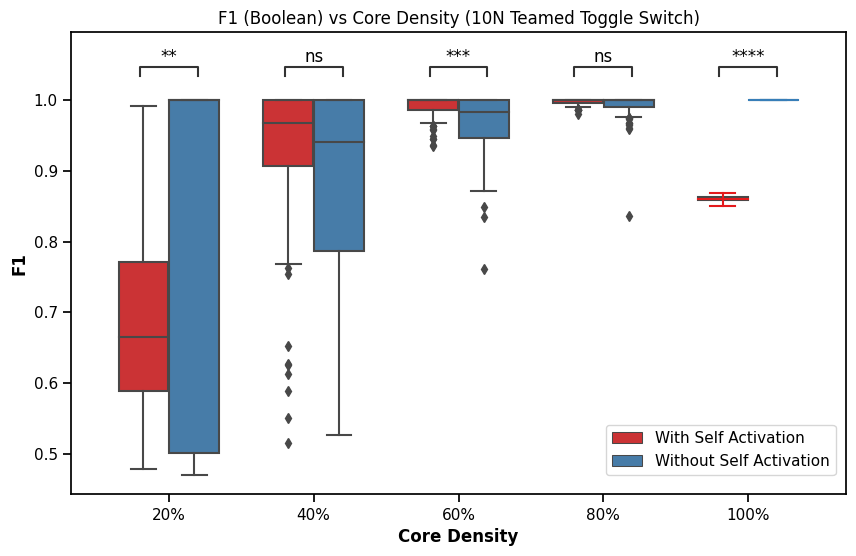

In [43]:
pairs = [
    [('20%', 'Without Self Activation'), ('20%', 'With Self Activation')],

    [('40%','Without Self Activation'), ('40%', 'With Self Activation')],


    [('60%', 'Without Self Activation'), ('60%','With Self Activation')],
    [('80%', 'Without Self Activation'), ('80%','With Self Activation')],


    [('100%', 'Without Self Activation'), ('100%','With Self Activation')]



]

#sub_cat_order=['All Nodes','Core']
#cat_order  = ['60 Edges','90 Edges','120 Edges','150 Edges']
cat_order = ['20%','40%','60%','80%','100%']
#hue_order = [2,4,6]
hue_plot_params = {
    'data':  melt_table_complete,
    'x': "Density",
    'y': "F1",
    "order": cat_order,
    "hue": "Self_Activation_Status"
    
}

plt.figure(figsize=(10, 6)) 
with sns.plotting_context("notebook"):
    # Create new plot
    ax = sns.boxplot(y="F1", hue="Self_Activation_Status", x="Density", data= melt_table_complete, width =0.7 ,
                     order = cat_order, palette = 'Set1')
    
    hue_colors = sns.color_palette("Set1", len(melt_table_complete["Self_Activation_Status"].unique()))
    for i, line in enumerate(ax.lines):
        box_index = i // 6
        if i//6 > 7:
            line.set_color(hue_colors[box_index % len(hue_colors)])


    # Plot with seaborn
    #ax = sns.boxplot(ax=ax, **hue_plot_params)

    # Add annotations
    annotator = Annotator(ax, pairs, **hue_plot_params)
    annotator.configure(test="Mann-Whitney", verbose=False)
    _, results = annotator.apply_and_annotate()
    plt.ylabel('F1', fontweight='bold')
    plt.xlabel('Core Density', fontweight='bold')
    plt.legend(bbox_to_anchor=(0.69, 0.15), loc='upper left', borderaxespad=0)
    # Label and show
    #add_legend(ax)
    #label_plot_for_states(ax)
    plt.title('F1 (Boolean) vs Core Density (10N Teamed Toggle Switch)')
    #plt.legend()
    #plt.legend(['2','4','6'],bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
    plt.savefig('plots/F1_vs_Core_Density_TS_Team_Boolean.png', bbox_inches='tight')
    plt.show()
    



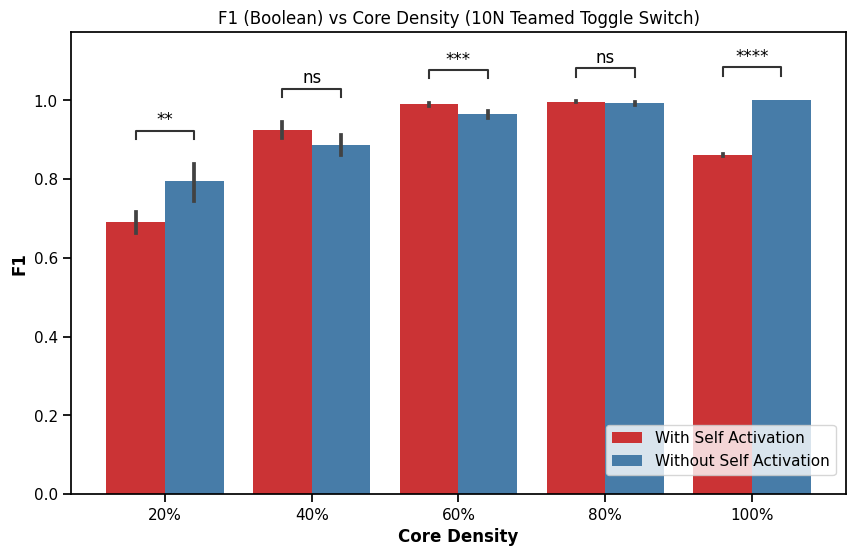

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

# Your existing pairs definition
pairs = [
    [('20%', 'Without Self Activation'), ('20%', 'With Self Activation')],
    [('40%','Without Self Activation'), ('40%', 'With Self Activation')],
    [('60%', 'Without Self Activation'), ('60%','With Self Activation')],
    [('80%', 'Without Self Activation'), ('80%','With Self Activation')],
    [('100%', 'Without Self Activation'), ('100%','With Self Activation')]
]

# Assuming you have your melt_table_complete and Annotator class defined

cat_order = ['20%', '40%', '60%', '80%', '100%']
hue_plot_params = {
    'data': melt_table_complete,
    'x': "Density",
    'y': "F1",
    "order": cat_order,
    "hue": "Self_Activation_Status"
}

plt.figure(figsize=(10, 6)) 
with sns.plotting_context("notebook"):
    # Create new plot
    ax = sns.barplot(y="F1", hue="Self_Activation_Status", x="Density", data=melt_table_complete, 
                     order=cat_order, palette='Set1')

    # Add annotations
    annotator = Annotator(ax, pairs, **hue_plot_params)
    annotator.configure(test="Mann-Whitney", verbose=False)
    _, results = annotator.apply_and_annotate()

    # Set labels and legend
    plt.ylabel('F1', fontweight='bold')
    plt.xlabel('Core Density', fontweight='bold')
    plt.legend(bbox_to_anchor=(0.69, 0.15), loc='upper left', borderaxespad=0)

    # Set title
    plt.title('F1 (Boolean) vs Core Density (10N Teamed Toggle Switch)')

    # Save and show the plot
    plt.savefig('plots/F1_vs_Core_Density_TS_Team_Boolean_bar.png', bbox_inches='tight')
    plt.show()


In [2]:
data = pd.read_csv('TT_data_unembedded_Feb6_Density_Varying_Figure2.csv')

,Unnamed: 0,index,Type,Core_Density,Peripheral_Nodes,Peripheral_Edges,BiC A,BiC B,CC AB,F1,F1_Individual_Nodes_Considered,Team_Strength,in_degree_Team_A,in_degree_Team_B,Number_of_Self_Activations,indegree,Self Activation Status,Team Size
0,0,Density 20%_With Self Activation_Network_0,Lowered Density,Density 20%,0 Nodes,0,0.647340,0.668579,-0.950908,0.652045,0.242943,0.802,0,0,0,0,With Self Activation,5.0
1,1,Density 20%_With Self Activation_Network_1,Lowered Density,Density 20%,0 Nodes,0,0.705669,0.711769,-0.946493,0.721913,0.276346,0.826,0,0,0,0,With Self Activation,5.0
2,2,Density 20%_With Self Activation_Network_2,Lowered Density,Density 20%,0 Nodes,0,0.656287,0.675676,-0.949461,0.667113,0.251189,0.789,0,0,0,0,With Self Activation,5.0
3,3,Density 20%_With Self Activation_Network_3,Lowered Density,Density 20%,0 Nodes,0,0.649820,0.661150,-0.952077,0.666360,0.210834,0.769,0,0,0,0,With Self Activation,5.0
4,4,Density 20%_With Self Activation_Network_4,Lowered Density,Density 20%,0 Nodes,0,0.569963,0.569269,-0.941426,0.543474,0.106023,0.563,0,0,0,0,With Self Activation,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
815,5,Density 100%_Without Self Activation_Network_5,Lowered Density,Density 100%,0 Nodes,0,0.980487,0.980361,-0.877207,0.998702,0.883845,0.500,0,0,0,0,Without Self Activation,5.0
816,6,Density 100%_Without Self Activation_Network_6,Lowered Density,Density 100%,0 Nodes,0,0.980409,0.980594,-0.877826,0.998801,0.886336,0.500,0,0,0,0,Without Self Activation,5.0
817,7,Density 100%_Without Self Activation_Network_7,Lowered Density,Density 100%,0 Nodes,0,0.980601,0.980782,-0.876809,0.998851,0.883922,0.500,0,0,0,0,Without Self Activation,5.0
818,8,Density 100%_Without Self Activation_Network_8,Lowered Density,Density 100%,0 Nodes,0,0.980432,0.980056,-0.875527,0.998851,0.882846,0.500,0,0,0,0,Without Self Activation,5.0


In [3]:
results_indegree_summary_params = pd.DataFrame(columns=[ 'Self Activation Status', 'a', 'b', 'x0', 'n','Density to achieve 50\%\ F1'])
results_indegree_summary_params

,Self Activation Status,a,b,x0,n,Density to achieve 50\%\ F1
